# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [1]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [2]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


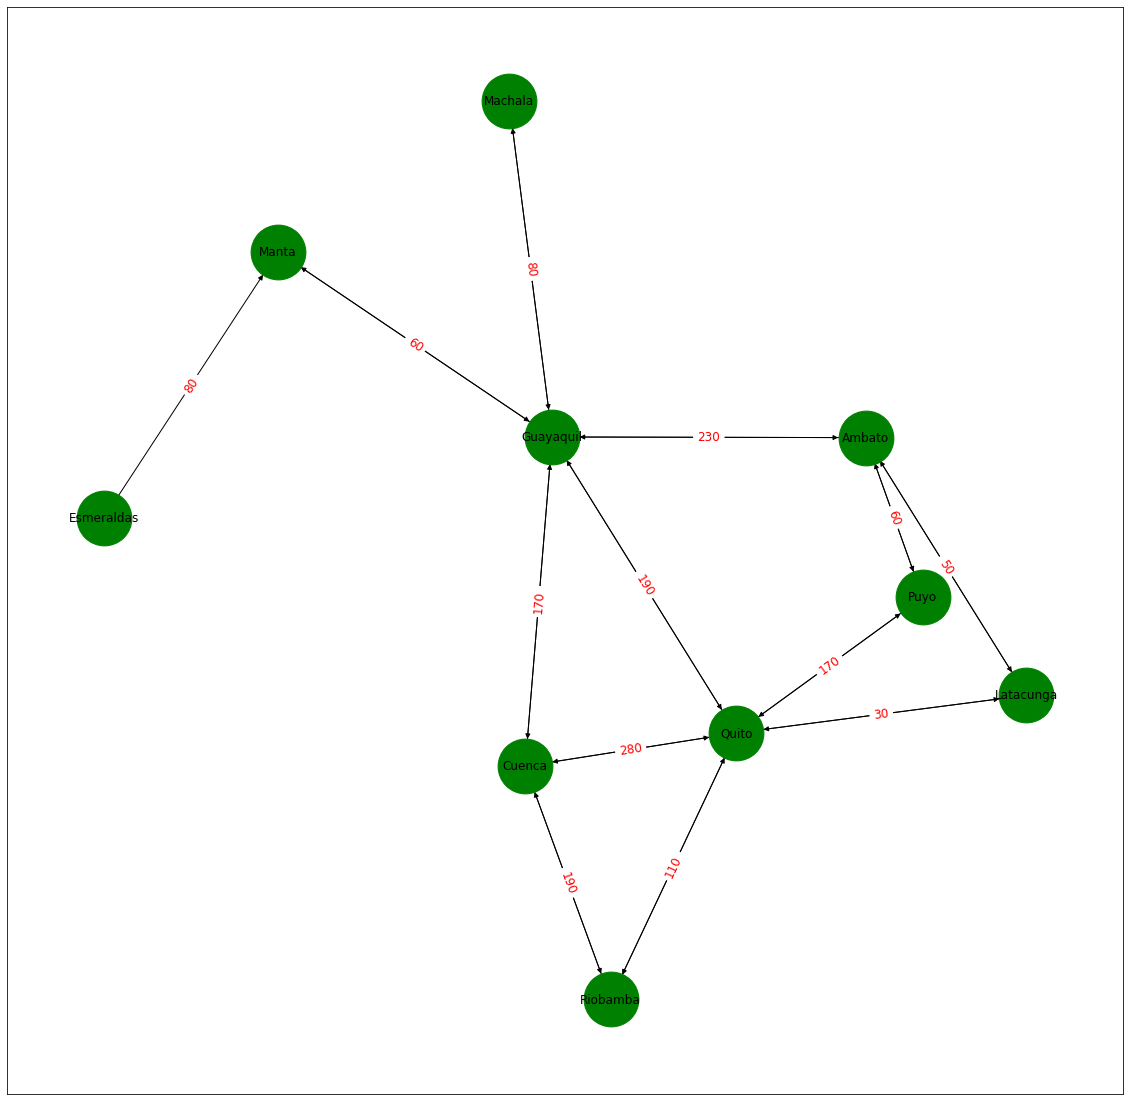

In [3]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
        
def grafico(diccionario):
    g = nx.DiGraph()
    g.add_nodes_from(diccionario)
    for valor, listaValor in diccionario.items():
        for a in listaValor:
            g.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
    posicion = nx.spring_layout(g)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(g,'length')
    nx.draw_networkx(g, posicion, node_color = 'green', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(g,posicion,edge_labels=labels,font_color='red',font_size=12)
    plt.show()
      
grafico(connections)

## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


Ejercicio
n=15
d=7
b=?
Complejidad Temporal
n=7
O(b^n)
O=2.14^7
O=205.54

Complejidad Espacial
O(n*b)
O=7 *2.14
O=14.98

['Casa', 'UPC San Sebastian', 'UPC San Sebastian1', 'UPC Bellavista', 'UPC Terminal Terrestre', 'UPC Totoracocha']
Costo total: 5.43


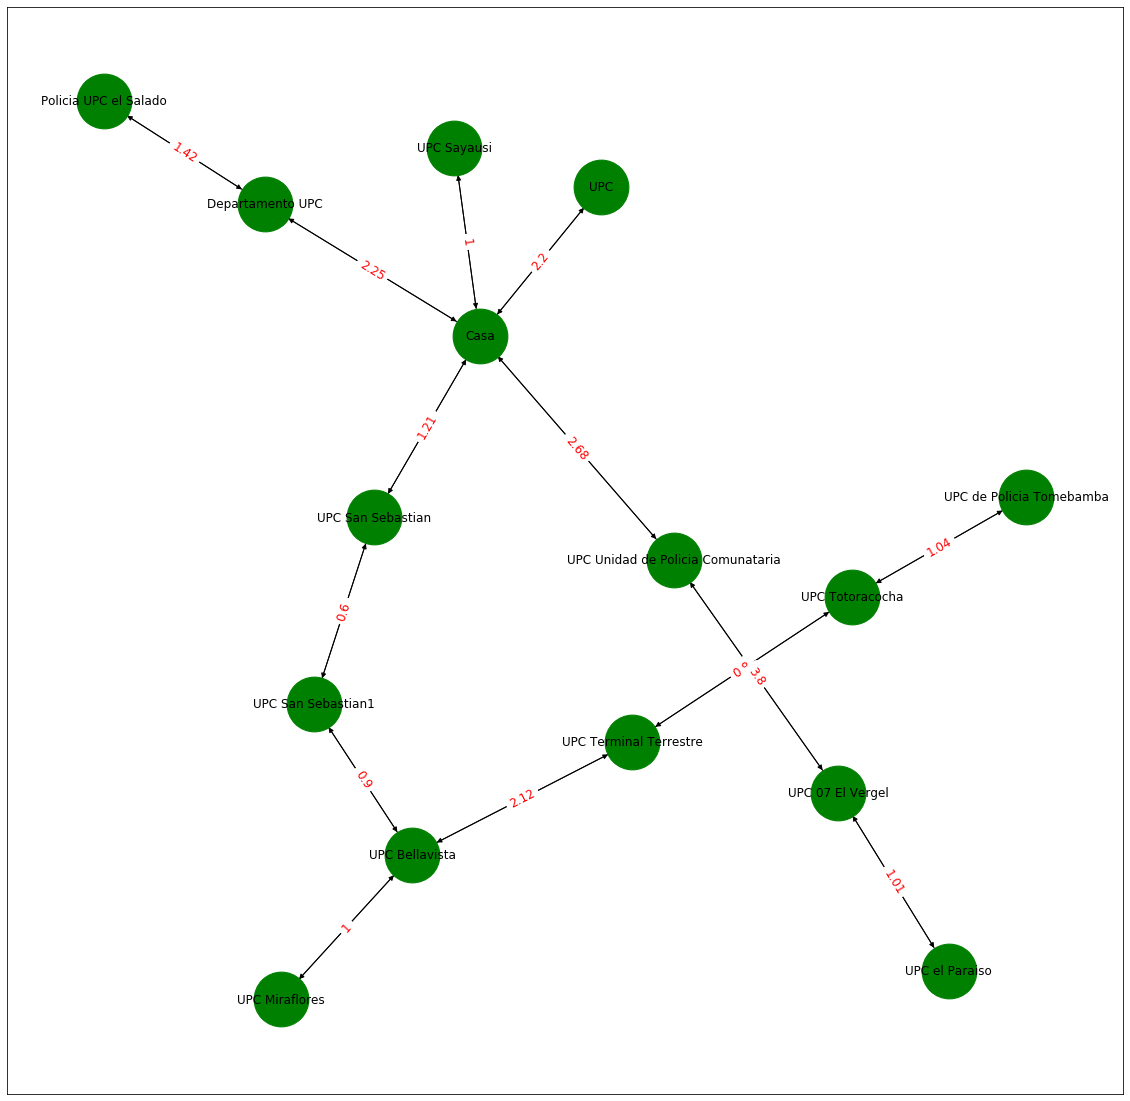

In [6]:
# Implementar
def busqueda_costes(connections, init_state, solution):
    solved = False  # Variable para almacenar el estado de la busqueda
    visited_nodes = []  # Nodos visitados
    frontier_nodes = []  # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state)  # Nodo inicial
    init_node.cost = 0  # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare)  # Ordenar lista de nodos
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0))  # Extraer nodo y añadirlo a visitados
        if node.data == solution:  # Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data  # Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]:  # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild]  # Obtener el costo del nodo
                child.cost = node.cost + cost  # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(
                            frontier_nodes):  # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)


if __name__ == "__main__":

    connections = {
        'Casa': {'UPC Sayausi':1, 'UPC San Sebastian':1.21, 'UPC':2.20, 'Departamento UPC':2.25,
                 'UPC Unidad de Policia Comunataria':2.68},
        'UPC Sayausi': {'Casa':1},
        'UPC San Sebastian': {'UPC San Sebastian1':0.4, 'Casa':1.21},
        'UPC Unidad de Policia Comunataria': {'UPC 07 El Vergel':3.8, 'Casa':2.68,},
        'UPC San Sebastian1': {'UPC Bellavista':0.9, 'UPC San Sebastian':0.6},
        'UPC Bellavista': {'UPC Miraflores':1, 'UPC Terminal Terrestre':2.12, 'UPC San Sebastian1':0.9},
        'Departamento UPC': {'Policia UPC el Salado':1.42, 'Casa':2.25},
        'Policia UPC el Salado': {'Departamento UPC':1.42},
        'UPC': {'Casa':2.20},
        'UPC Miraflores': {'UPC Bellavista':1},
        'UPC Terminal Terrestre': {'UPC Totoracocha':0.8, 'UPC Bellavista':2.12},
        'UPC Totoracocha': {'UPC de Policia Tomebamba':1.04, 'UPC Terminal Terrestre':0.8},
        'UPC el Paraiso': {'UPC 07 El Vergel':1.01},
        'UPC 07 El Vergel': {'UPC el Paraiso':1.01, 'UPC Unidad de Policia Comunataria':3.8},
        'UPC de Policia Tomebamba': {'UPC Totoracocha':1.04}
    }

    init_state = 'Casa'
    solution = 'UPC Totoracocha'
    solution_node = busqueda_costes(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None:
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse()  # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost))  # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion :)")

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def grafico(diccionario):
    g = nx.DiGraph()
    g.add_nodes_from(diccionario)
    for valor, listaValor in diccionario.items():
        for a in listaValor:
            g.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
    posicion = nx.spring_layout(g)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(g,'length')
    nx.draw_networkx(g, posicion, node_color = 'green', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(g,posicion,edge_labels=labels,font_color='red',font_size=12)
    plt.show()
      
grafico(connections)

COVID-19
Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


['Los Rios', 'Guayas']
Costo total: 5551


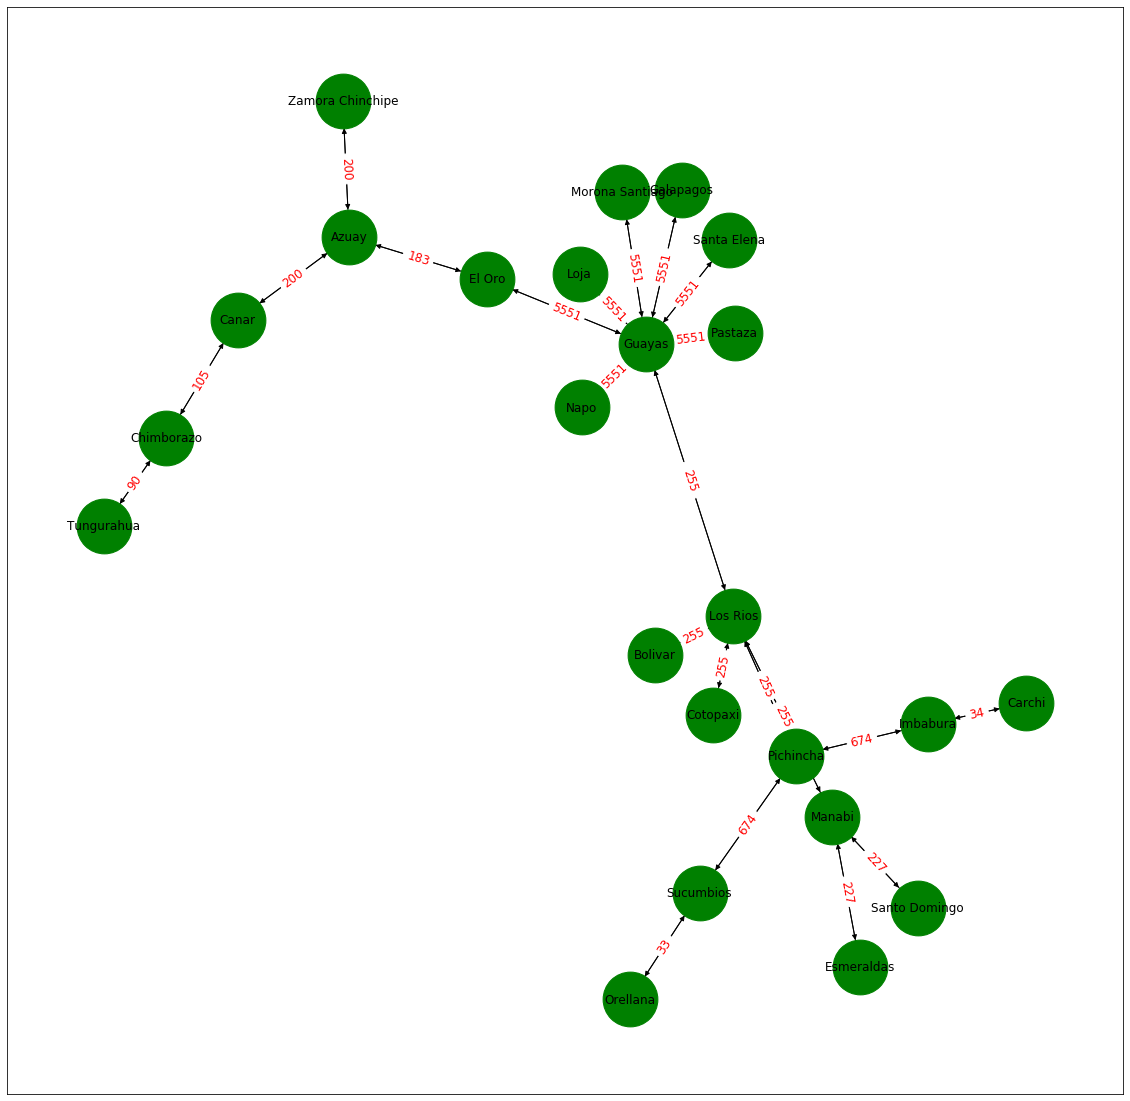

In [7]:
def busqueda_coste_covid(connections, init_state, solution):
    solved = False  # Variable para almacenar el estado de la busqueda
    visited_nodes = []  # Nodos visitados
    frontier_nodes = []  # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state)  # Nodo inicial
    init_node.cost = 0  # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare)  # Ordenar lista de nodos
        #print(listarElementos(frontier_nodes))
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0))  # Extraer nodo y añadirlo a visitados
        if node.data == solution:  # Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data  # Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]:  # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild]  # Obtener el costo del nodo
                child.cost = node.cost + cost  # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(
                            frontier_nodes):  # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":

    connections = {
        
        'Los Rios': {'Bolivar':33, 'Cotopaxi':45, 'Manabi':227, 'Pichincha':674, 'Guayas':5551},
        'Bolivar': {'Los Rios': 255},
        'Cotopaxi': {'Los Rios': 255},
        'Manabi':{'Esmeraldas':44, 'Santo Domingo':67, 'Los Rios':255},
        'Esmeraldas':{'Manabi':227},
        'Santo Domingo':{'Manabi':227},

        'Pichincha':{'Sucumbios':33, 'Imbabura':34 ,'Los Rios':255},
        'Sucumbios':{'Orellana':6,'Pichincha':674},
        'Orellana':{'Sucumbios':33},
        'Imbabura':{'Carchi':26, 'Pichincha':674},
        'Carchi':{'Imbabura':34},

        'Guayas':{'Napo':8, 'Pastaza':16, 'Galapagos':11, 'Santa Elena':92, 'Morona Santiago':21, 'Loja':85, 'El Oro':183, 'Los Rios':255},
        'Napo':{'Guayas':5551},
        'Pastaza':{'Guayas':5551},
        'Galapagos':{'Guayas':5551},
        'Santa Elena':{'Guayas':5551},
        'Morona Santiago':{'Guayas':5551},
        'Loja':{'Guayas':5551},
        'El Oro':{'Azuay':200, 'Guayas':5551},

        'Azuay':{'Canar':105, 'Zamora Chinchipe':5, 'El Oro':183},
        'Canar':{'Chimborazo':90, 'Azuay':200},
        'Chimborazo':{'Tungurahua':47, 'Canar':105},
        'Tungurahua':{'Chimborazo':90},
        'Zamora Chinchipe':{'Azuay':200}
    }

    init_state = 'Los Rios'
    solution = 'Guayas'
    solution_node = busqueda_coste_covid(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None:
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse()  # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost))  # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion")

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def grafico(diccionario):
    g = nx.DiGraph()
    g.add_nodes_from(diccionario)
    for valor, listaValor in diccionario.items():
        for a in listaValor:
            g.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
    posicion = nx.spring_layout(g)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(g,'length')
    nx.draw_networkx(g, posicion, node_color = 'green', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(g,posicion,edge_labels=labels,font_color='red',font_size=12)
    plt.show()
      
grafico(connections)

# Conclusiones
Este metodo b